In [45]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [47]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [48]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
coordinates = zip(lats, lngs)

In [49]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

 153.55172096665183
13.760172001381633 -11.286824756176514
44.61806669625716 98.90366048741629
-84.73824827063417 6.592641597200441
-38.37473677916685 71.15734966662174
-69.71993622678622 142.85244077286103
48.62511025444232 -126.61142549657734
-16.52674711600355 34.29358039403243
74.15212968684983 153.4447413608459
-33.134712568393994 -71.9397331960744
51.346664634780865 114.47700488322477
71.54029802823916 111.09715088694759
31.79707762923384 149.4315907717642
-24.558544879933493 40.625765849582905
-88.87550646434936 -96.97523198223404
-77.96904628572408 -160.5626518557823
2.790346293331339 91.47958515098452
74.30441062128091 -174.64374164052566
26.862222236691295 -141.05508708651294
-25.3246496040138 95.37913081048293
-56.71256219202954 82.53730861274113
-11.029010042348347 8.474443638827552
41.94719378942395 -165.05532188557544
-3.1251337208347394 164.7142874994674
23.86967051288113 127.40589398960668
-62.536447686854444 51.41163371244431
-0.14783476503259863 167.262493615847
14.70

In [50]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [51]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [52]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [53]:
# Starting URL for Weather Map API Call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [54]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": cities[i].title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

f Set 4 | bilibino
Processing Record 25 of Set 4 | hasaki
Processing Record 26 of Set 4 | madimba
Processing Record 27 of Set 4 | lorengau
Processing Record 28 of Set 4 | atuona
Processing Record 29 of Set 4 | qaanaaq
Processing Record 30 of Set 4 | ribeira grande
Processing Record 31 of Set 4 | khatanga
Processing Record 32 of Set 4 | boyolangu
Processing Record 33 of Set 4 | russell
Processing Record 34 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 35 of Set 4 | trelew
Processing Record 36 of Set 4 | baruun-urt
Processing Record 37 of Set 4 | ugoofaaru
Processing Record 38 of Set 4 | outjo
Processing Record 39 of Set 4 | pachino
Processing Record 40 of Set 4 | kallithea
Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | muscat
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | kalabo
Processing Record 45 of Set 4 | santa fe
Processing Record 46 of Set 4 | soyo
Processing Record 47 of Set 4 | port moresby
Processin

In [55]:
len(city_data)

575

In [56]:
print(city_data[2])
print(type(city_data[2]))

{'City': 'Provideniya', 'Lat': 64.3833, 'Lng': -173.3, 'Max Temp': 9.09, 'Humidity': 85, 'Cloudiness': 100, 'Wind Speed': 23.15, 'Country': 'RU', 'Date': '2021-04-11 17:44:14'}
<class 'dict'>


In [57]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
565,Guilin,25.2819,110.2864,60.80,94,90,1.86,CN,2021-04-11 17:41:41
566,Tubuala,9.5167,-79.0333,86.00,66,40,10.36,PA,2021-04-11 17:46:18
567,Westport,41.1415,-73.3579,59.00,93,90,16.11,US,2021-04-11 17:42:41
568,Grindavik,63.8424,-22.4338,39.20,87,75,21.85,IS,2021-04-11 17:44:33
569,Rayagada,19.1667,83.4167,82.35,57,90,4.34,IN,2021-04-11 17:46:18
570,Copiapo,-27.3667,-70.3333,60.80,77,75,9.22,CL,2021-04-11 17:46:19
571,Batemans Bay,-35.7167,150.1833,53.01,58,17,1.99,AU,2021-04-11 17:45:25
572,San Patricio,28.0170,-97.5169,84.20,51,1,6.91,US,2021-04-11 17:46:19
573,Codrington,-38.2667,141.9667,54.90,75,100,11.12,AU,2021-04-11 17:43:59
574,Na Wa,17.4897,104.1006,80.76,59,100,8.30,TH,2021-04-11 17:46:19


In [58]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kiruna,SE,2021-04-11 17:44:14,67.8557,20.2251,30.20,69,0,11.50
1,Bambous Virieux,MU,2021-04-11 17:44:00,-20.3428,57.7575,78.80,89,40,5.75
2,Provideniya,RU,2021-04-11 17:44:14,64.3833,-173.3000,9.09,85,100,23.15
3,Rikitea,PF,2021-04-11 17:40:53,-23.1203,-134.9692,78.24,75,8,11.14
4,Tuktoyaktuk,CA,2021-04-11 17:44:15,69.4541,-133.0374,-18.40,69,1,3.44
...,...,...,...,...,...,...,...,...,...
570,Copiapo,CL,2021-04-11 17:46:19,-27.3667,-70.3333,60.80,77,75,9.22
571,Batemans Bay,AU,2021-04-11 17:45:25,-35.7167,150.1833,53.01,58,17,1.99
572,San Patricio,US,2021-04-11 17:46:19,28.0170,-97.5169,84.20,51,1,6.91
573,Codrington,AU,2021-04-11 17:43:59,-38.2667,141.9667,54.90,75,100,11.12


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [76]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

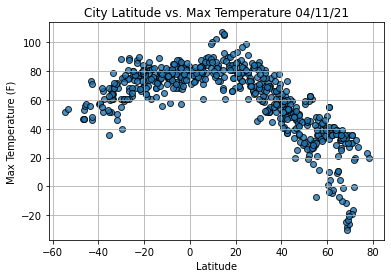

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

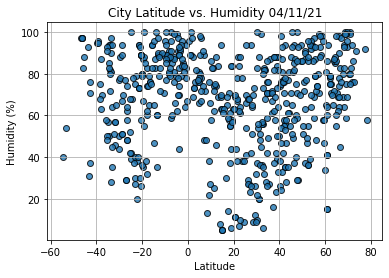

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

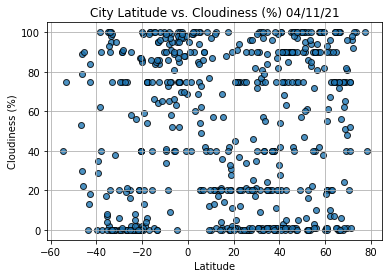

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

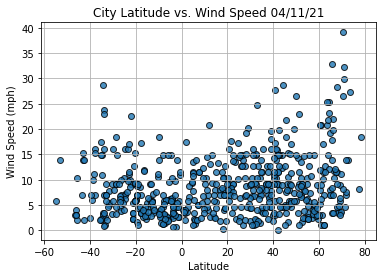

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [82]:
# Import linregress
from scipy.stats import linregress

In [86]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [88]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

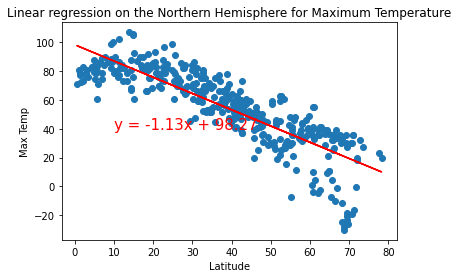

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear regression on the Northern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [102]:
(scope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print((scope, intercept, r_value, p_value, std_err))

(-1.12777047290063, 98.2682939275748, -0.8448872105440236, 4.168265300045285e-103, 0.03702194470996885)


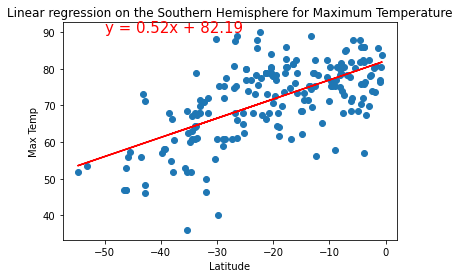

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear regression on the Southern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [103]:
(scope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print((scope, intercept, r_value, p_value, std_err))

(0.5228028738873168, 82.19353894779466, 0.6258525690142513, 2.968472554024677e-23, 0.04618504311201579)


In [100]:
(scope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print((scope, intercept, r_value, p_value, std_err))

(0.5228028738873168, 82.19353894779466, 0.6258525690142513, 2.968472554024677e-23, 0.04618504311201579)


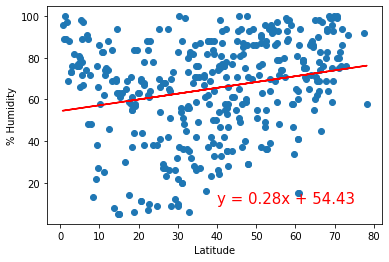

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

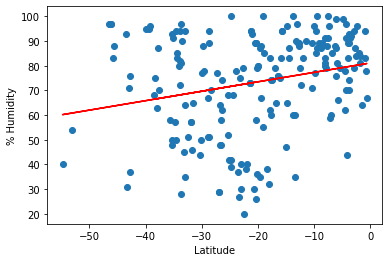

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

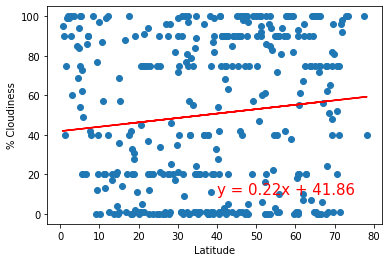

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

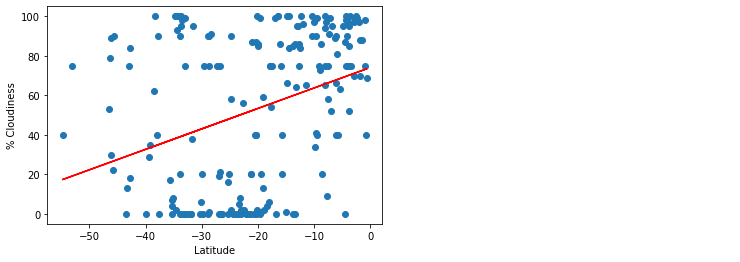

In [109]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

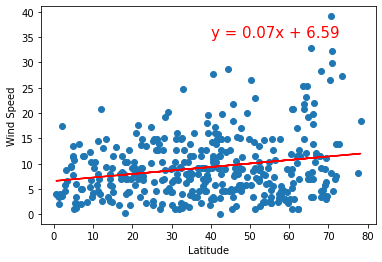

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

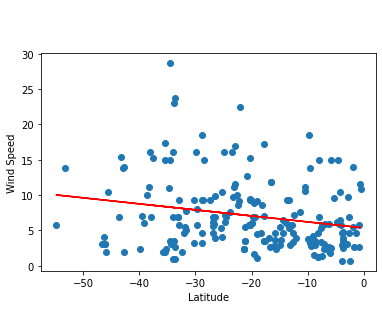

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))